# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Ahda Sabila
- **Email:** dimasahda@gmail.com
- **ID Dicoding:**  Dimmas - b25b9d040

## Menentukan Pertanyaan Bisnis

- Bagaimana pola performa penjualan (jumlah pesanan dan pendapatan) dari waktu ke waktu, dan kategori produk apa yang paling tinggi penjualannya?
- Bagaimana hubungan antara waktu pengiriman (delivery time) dengan kepuasan pelanggan (review score)?

## Import Semua Packages/Library yang Digunakan

In [50]:
# --- Import library ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [52]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q brazilian-ecommerce.zip -d olist_dataset

In [54]:
!ls

brazilian-ecommerce.zip		  olist_order_reviews_dataset.csv
olist_cleaned_dataset.csv	  olist_orders_dataset.csv
olist_customers_dataset.csv	  olist_products_dataset.csv
olist_dataset			  olist_sellers_dataset.csv
olist_geolocation_dataset.csv	  product_category_name_translation.csv
olist_order_items_dataset.csv	  sample_data
olist_order_payments_dataset.csv


In [55]:
# --- Load/Baca semua dataset utama Olist ---
orders = pd.read_csv('olist_dataset/olist_orders_dataset.csv')
order_items = pd.read_csv('olist_dataset/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('olist_dataset/olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_dataset/olist_products_dataset.csv')
customers = pd.read_csv('olist_dataset/olist_customers_dataset.csv')
sellers = pd.read_csv('olist_dataset/olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_dataset/olist_geolocation_dataset.csv')

print("Orders shape:", orders.shape)
print("Order Items shape:", order_items.shape)
print("Order Reviews shape:", order_reviews.shape)
print("Products shape:", products.shape)
print("Customers shape:", customers.shape)
print("Sellers shape:", sellers.shape)
print("Geolocation shape:", geolocation.shape)

Orders shape: (99441, 8)
Order Items shape: (112650, 7)
Order Reviews shape: (99224, 7)
Products shape: (32951, 9)
Customers shape: (99441, 5)
Sellers shape: (3095, 4)
Geolocation shape: (1000163, 5)


In [56]:
print("Orders shape:", orders.shape)
orders.head()

Orders shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [57]:
print("Order Items shape:", order_items.shape)
order_items.head()

Order Items shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [58]:
print("Order Reviews shape:", order_reviews.shape)
order_reviews.head()

Order Reviews shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [59]:
print("Products shape:", products.shape)
products.head()

Products shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [60]:
print("Customers shape:", customers.shape)
customers.head()

Customers shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [61]:
print("Sellers shape:", sellers.shape)
sellers.head()

Sellers shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [62]:
print("Geolocation shape:", geolocation.shape)
geolocation.head()

Geolocation shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `orders`,`order_items`,`order_reviews`,`products`,`customers`,`sellers`,`geolocation`

In [63]:
# --- Cek struktur data dan missing values untuk semua tabel ---

datasets = {
    'orders': orders,
    'order_items': order_items,
    'order_reviews': order_reviews,
    'products': products,
    'customers': customers,
    'sellers': sellers,
    'geolocation': geolocation
}

for name, df in datasets.items():
    print(f"\n===== Dataset: {name.upper()} =====")
    print(f"Shape: {df.shape}")
    print("\nInfo:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nPreview Data:")
    display(df.head(3))
    print("="*60)


===== Dataset: ORDERS =====
Shape: (99441, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
o

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



===== Dataset: ORDER_ITEMS =====
Shape: (112650, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Preview Data:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



===== Dataset: ORDER_REVIEWS =====
Shape: (99224, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Missing Values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Preview Data:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



===== Dataset: PRODUCTS =====
Shape: (32951, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Missing Values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
prod

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



===== Dataset: CUSTOMERS =====
Shape: (99441, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Preview Data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



===== Dataset: SELLERS =====
Shape: (3095, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Missing Values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Preview Data:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ



===== Dataset: GEOLOCATION =====
Shape: (1000163, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Missing Values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Preview Data:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


**Insight:**
Secara umum dataset cukup bersih dan siap untuk tahap cleaning ringan + merging. Missing Value hanya terdapat pada beberapa tabel berikut

- table orders (waktu pengiriman dan persetujuan)
- table order_reviews (kolom teks komentar)
- products (kategori dan atribut produk)

Untuk melakukan analisis berikutnya

- Untuk analisis penjualan dan revenue, missing di orders tidak masalah selama kita filter hanya delivered orders.

- Untuk analisis kepuasan pelanggan, review_score tetap bisa digunakan karena tidak memiliki missing.

- Untuk analisis kategori produk, missing pada product_category_name bisa diatasi dengan mengisi “unknown”.

### Cleaning Data

In [64]:
# Melihat total missing value per tabel
for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    display(df.isnull().sum())


--- ORDERS ---


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0



--- ORDER_ITEMS ---


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0



--- ORDER_REVIEWS ---


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0



--- PRODUCTS ---


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2



--- CUSTOMERS ---


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0



--- SELLERS ---


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0



--- GEOLOCATION ---


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [65]:
# Untuk analisis penjualan selesai, hanya ambil yang sudah delivered
orders = orders[orders['order_status'] == 'delivered'].copy()

# order_reviews: drop NA di review_score (tidak bisa diisi)
order_reviews = order_reviews.dropna(subset=['review_score']).copy()

# customers: tidak ada missing value penting
# products: drop product_category_name yang kosong
products = products.dropna(subset=['product_category_name']).copy()

# order_items: pastikan tidak ada duplikat order_id + product_id
order_items = order_items.drop_duplicates(subset=['order_id', 'product_id'])


In [66]:
datetime_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in datetime_cols:
    orders[col] = pd.to_datetime(orders[col])


In [67]:
for name, df in datasets.items():
    dup_count = df.duplicated().sum()
    print(f"{name}: {dup_count} duplikat")

orders = orders.drop_duplicates()
order_items = order_items.drop_duplicates()
order_reviews = order_reviews.drop_duplicates()
customers = customers.drop_duplicates()
products = products.drop_duplicates()



orders: 0 duplikat
order_items: 0 duplikat
order_reviews: 0 duplikat
products: 0 duplikat
customers: 0 duplikat
sellers: 0 duplikat
geolocation: 261831 duplikat


## Merge Table

In [68]:
# Merge orders + customers
merged_df = orders.merge(customers, on='customer_id', how='left')

# Merge order_items
merged_df = merged_df.merge(order_items, on='order_id', how='left')

# Merge products
merged_df = merged_df.merge(products, on='product_id', how='left')

# Merge order_reviews
merged_df = merged_df.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')

print("Ukuran dataset akhir:", merged_df.shape)
merged_df.head()


Ukuran dataset akhir: (100777, 27)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,5.0


In [69]:
## cek missing value setelah merge table
merged_df.isnull().sum().sort_values(ascending=False).head(15)


,0
product_width_cm,1410
product_height_cm,1410
product_length_cm,1410
product_weight_g,1410
product_description_lenght,1409
product_name_lenght,1409
product_category_name,1409
product_photos_qty,1409
review_score,693
order_approved_at,14


In [70]:
merged_df.to_csv("olist_cleaned_dataset.csv", index=False)
print("✅ Dataset cleaned & merged berhasil disimpan.")


✅ Dataset cleaned & merged berhasil disimpan.


**Insight:**
- Membersihkan data dari nilai kosong atau tidak valid.

- Menggabungkan semua tabel agar bisa dianalisis secara utuh

## Exploratory Data Analysis (EDA)

### Explore ...

In [71]:
## Overview keseluruhan datasets dari hasil table yang sudah dimerge

print("Ukuran dataset:", merged_df.shape)
print("\nTipe data:")
display(merged_df.dtypes.head(15))

print("\nStatistik deskriptif:")
display(merged_df.describe())

Ukuran dataset: (100777, 27)

Tipe data:


,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]
customer_unique_id,object
customer_zip_code_prefix,int64



Statistik deskriptif:


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,100777,100763,100775,100769,100777,100777.000000,100777.000000,100777.000000,100777.000000,99368.000000,99368.000000,99368.000000,99367.000000,99367.000000,99367.000000,99367.000000,100084.000000
mean,2018-01-01 15:21:34.729700352,2018-01-02 02:43:09.317984,2018-01-04 20:46:31.406519296,2018-01-14 03:11:18.372872704,2018-01-25 10:20:47.927602688,35142.209492,1.047362,123.569891,20.057766,48.907475,785.567245,2.237863,2088.927652,30.134049,16.384766,23.077782,4.125804
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,2017-09-13 19:58:52,2017-09-14 08:15:11,2017-09-15 21:49:51.500000,2017-09-25 19:52:06,2017-10-05 00:00:00,11320.000000,1.000000,40.000000,13.130000,43.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,2018-01-19 23:43:48,2018-01-20 13:42:13,2018-01-23 23:18:58,2018-02-02 00:37:51,2018-02-15 00:00:00,24417.000000,1.000000,78.000000,16.320000,52.000000,602.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,2018-05-05 12:28:16,2018-05-05 18:30:12,2018-05-08 13:50:30,2018-05-15 20:08:51,2018-05-28 00:00:00,59020.000000,1.000000,139.000000,21.180000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000
std,NaN,NaN,NaN,NaN,NaN,29834.091151,0.281239,187.308184,15.757481,9.978238,649.321264,1.741608,3738.826713,16.099563,13.280501,11.737447,1.310688


## Visualization & Explanatory Analysis

## Jumlah Pesanan per Tahun dan Bulan

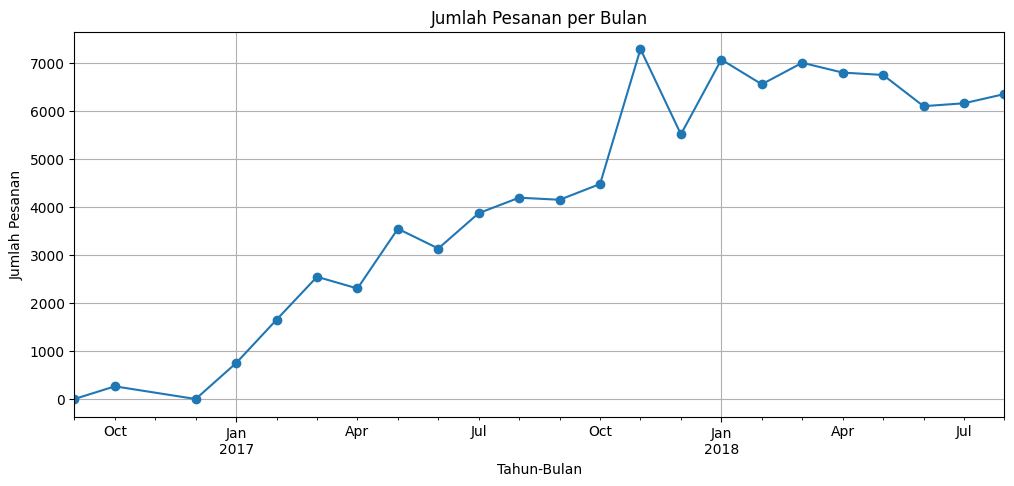

In [72]:
## Tujuan: melihat pertumbuhan atau pola musiman.

merged_df['order_year_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = merged_df.groupby('order_year_month')['order_id'].nunique()

plt.figure(figsize=(12,5))
orders_per_month.plot(kind='line', marker='o')
plt.title('Jumlah Pesanan per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

## Pendapatan per Bulan

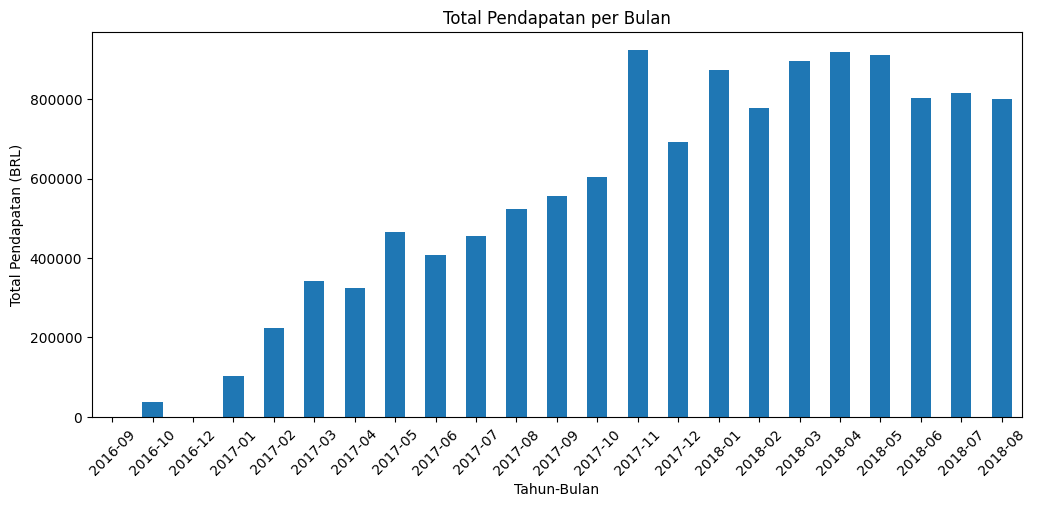

In [73]:
revenue_per_month = merged_df.groupby('order_year_month')['price'].sum()

plt.figure(figsize=(12,5))
revenue_per_month.plot(kind='bar')
plt.title('Total Pendapatan per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Pendapatan (BRL)')
plt.xticks(rotation=45)
plt.show()

## Top 10 Kategori Produk dengan Penjualan Tertinggi

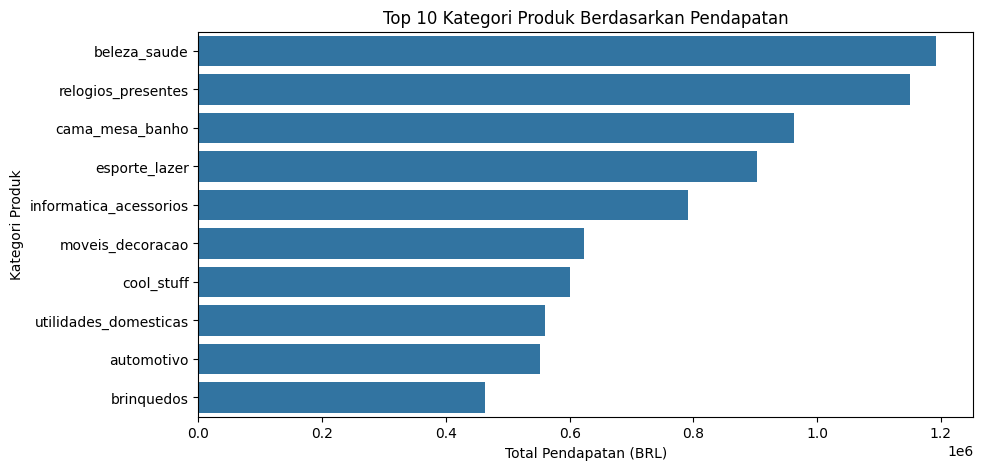

In [74]:
top_products = (
    merged_df.groupby('product_category_name')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Kategori Produk Berdasarkan Pendapatan")
plt.xlabel("Total Pendapatan (BRL)")
plt.ylabel("Kategori Produk")
plt.show()



##Distribusi Review Score

/tmp/ipython-input-2954145886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=merged_df, palette='pastel')


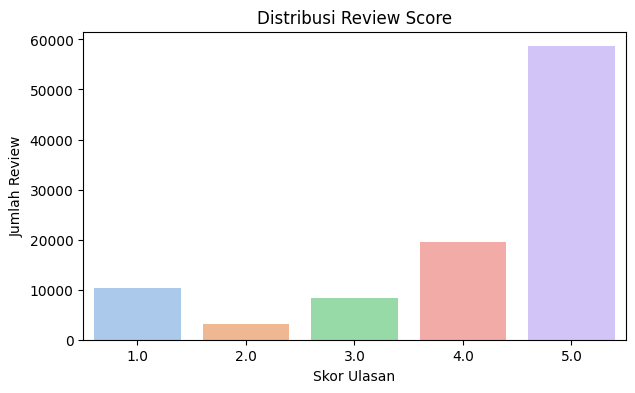

In [75]:
plt.figure(figsize=(7,4))
sns.countplot(x='review_score', data=merged_df, palette='pastel')
plt.title('Distribusi Review Score')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Review')
plt.show()


##Delivery Time

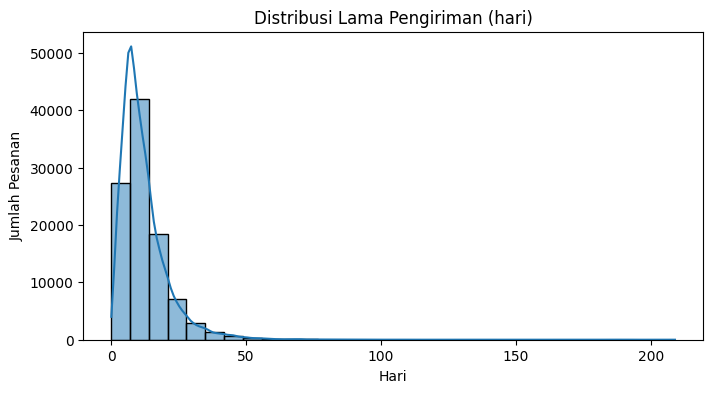

In [76]:
merged_df['delivery_time_days'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']
).dt.days

plt.figure(figsize=(8,4))
sns.histplot(merged_df['delivery_time_days'], bins=30, kde=True)
plt.title('Distribusi Lama Pengiriman (hari)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pesanan')
plt.show()

##Analisis Hubungan Score Review dengan Delivery Time

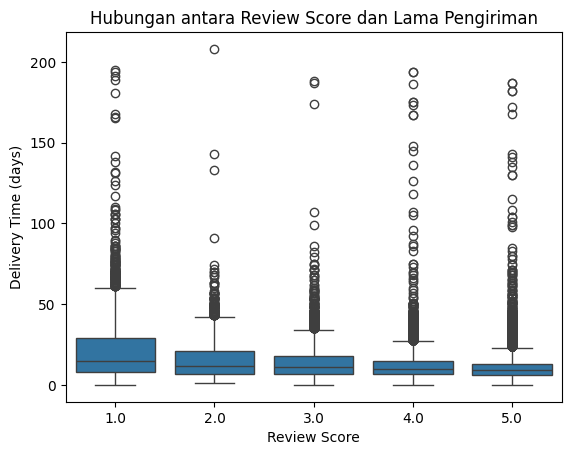

In [77]:
sns.boxplot(x='review_score', y='delivery_time_days', data=merged_df)
plt.title('Hubungan antara Review Score dan Lama Pengiriman')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.show()

### Pertanyaan 1:
Bagaimana pola performa penjualan (jumlah pesanan dan pendapatan) dari waktu ke waktu, dan kategori produk apa yang paling tinggi penjualannya?

##Tren Jumlah Pesanan per Bulan

/tmp/ipython-input-611648940.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(orders_per_month[period_col]):


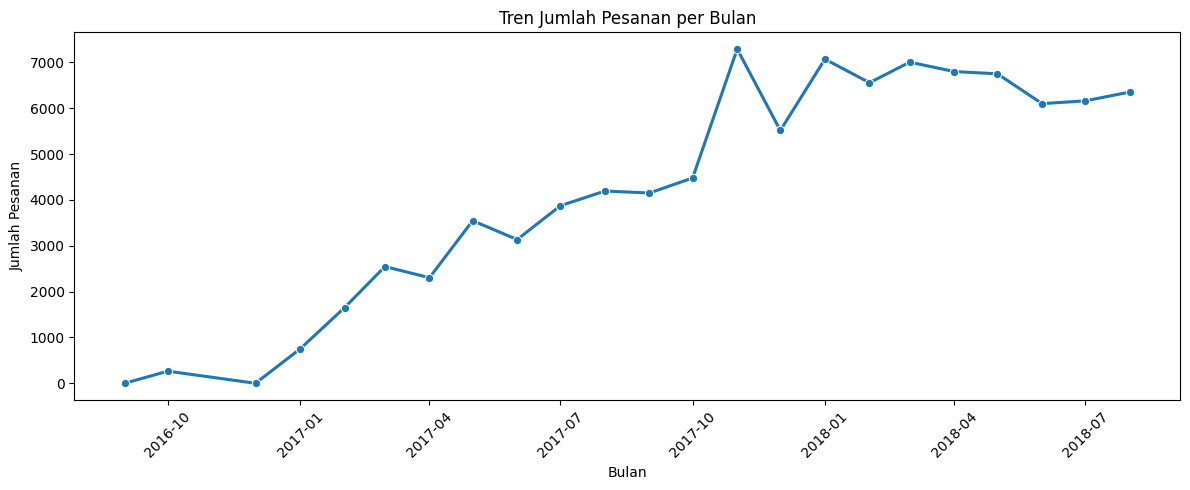

In [90]:
# Pastikan kolom waktu dan delivery_time ada
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
# Jika order_delivered_customer_date ada, convert
if 'order_delivered_customer_date' in merged_df.columns:
    merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'], errors='coerce')

# Buat kolom delivery_time_days kalau belum ada
if 'delivery_time_days' not in merged_df.columns:
    merged_df['delivery_time_days'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days


orders_per_month = (
    merged_df
    .groupby(merged_df['order_purchase_timestamp'].dt.to_period('M'))['order_id']
    .nunique()
    .reset_index(name='num_orders')   # sekarang ini ada kolom period + num_orders
)

# Kolom period biasanya bertipe PeriodDtype - ubah ke Timestamp agar mudah di-plot
period_col = orders_per_month.columns[0]
if pd.api.types.is_period_dtype(orders_per_month[period_col]):
    orders_per_month[period_col] = orders_per_month[period_col].dt.to_timestamp()

orders_per_month = orders_per_month.rename(columns={period_col: 'order_year_month'})

orders_per_month = orders_per_month.sort_values('order_year_month')

# Plot - line chart
plt.figure(figsize=(12,5))
sns.lineplot(x='order_year_month', y='num_orders', data=orders_per_month, marker='o', linewidth=2.2)
plt.title('Tren Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##Tren Pendapatan per Bulan

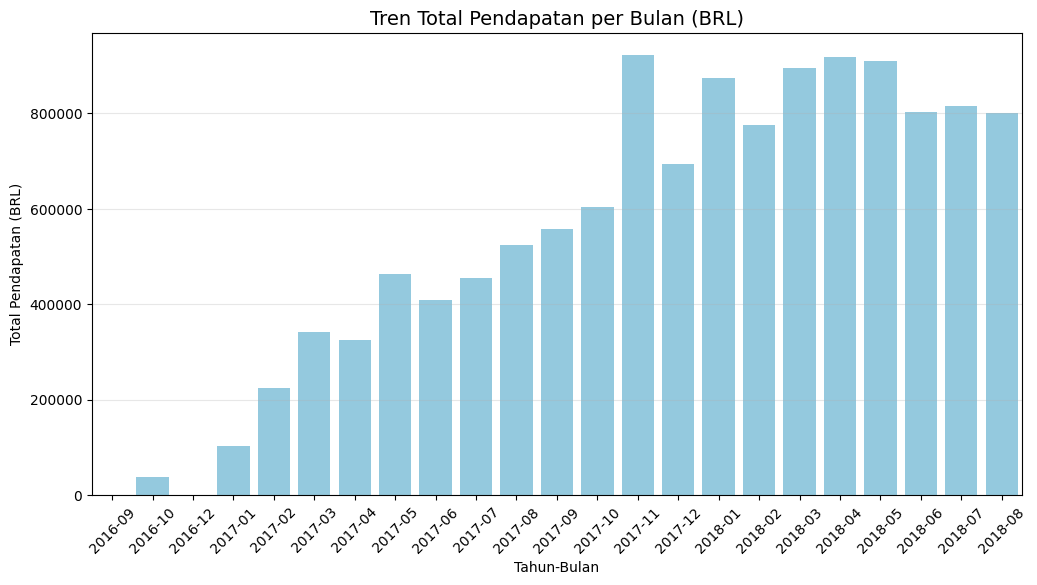

In [80]:
revenue_per_month = merged_df.groupby('order_year_month')['price'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='order_year_month', y='price', data=revenue_per_month, color='skyblue')
plt.title('Tren Total Pendapatan per Bulan (BRL)', fontsize=14)
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Pendapatan (BRL)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

##10 Kategori Produk dengan Penjualan Tertinggi

/tmp/ipython-input-1017307027.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product_category_name', x='price', data=top10_products, palette='cool')


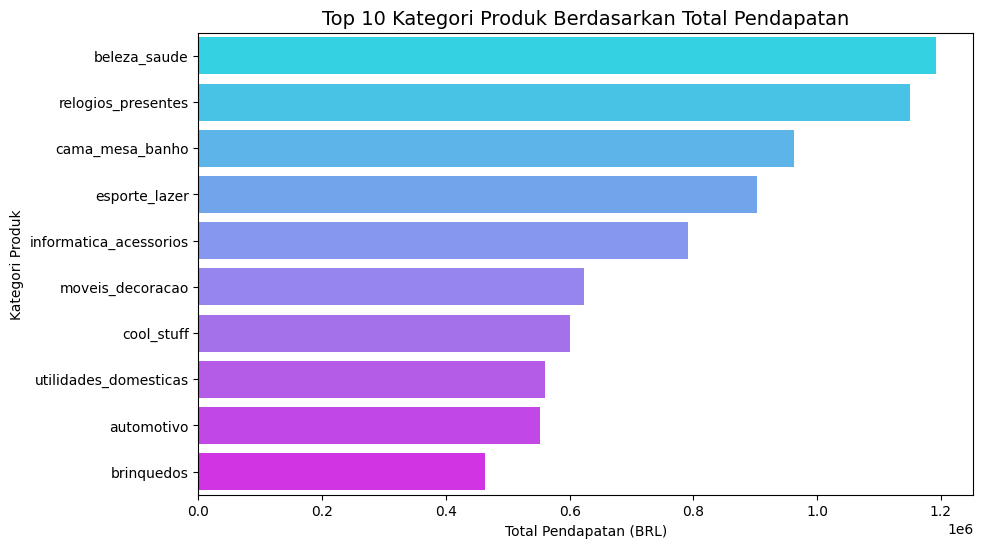

In [81]:
top10_products = (
    merged_df.groupby('product_category_name')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(y='product_category_name', x='price', data=top10_products, palette='cool')
plt.title('Top 10 Kategori Produk Berdasarkan Total Pendapatan', fontsize=14)
plt.xlabel('Total Pendapatan (BRL)')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2:
Bagaimana hubungan antara waktu pengiriman (delivery time) dengan kepuasan pelanggan (review score)?

## Distribusi Lama Pengiriman

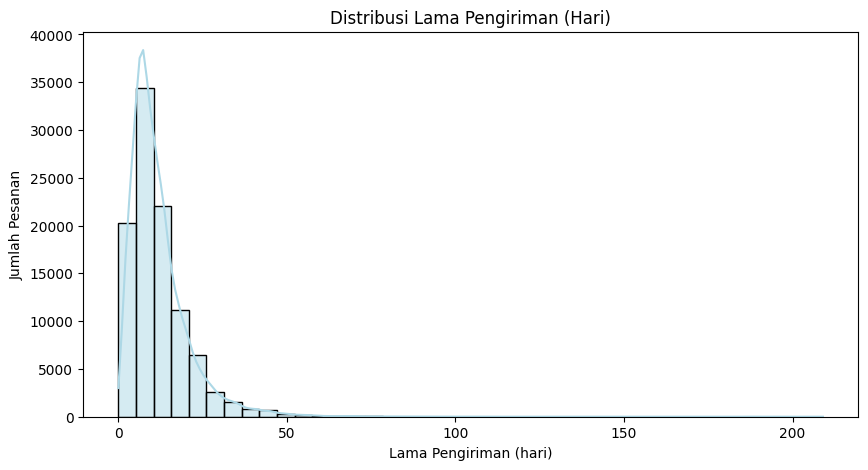

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df['delivery_time_days'], bins=40, kde=True, color='lightblue')
plt.title('Distribusi Lama Pengiriman (Hari)')
plt.xlabel('Lama Pengiriman (hari)')
plt.ylabel('Jumlah Pesanan')
plt.show()

## Rata-rata Waktu Pengiriman per Skor Review

/tmp/ipython-input-92632087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='delivery_time_days', data=delivery_vs_review, palette='coolwarm')


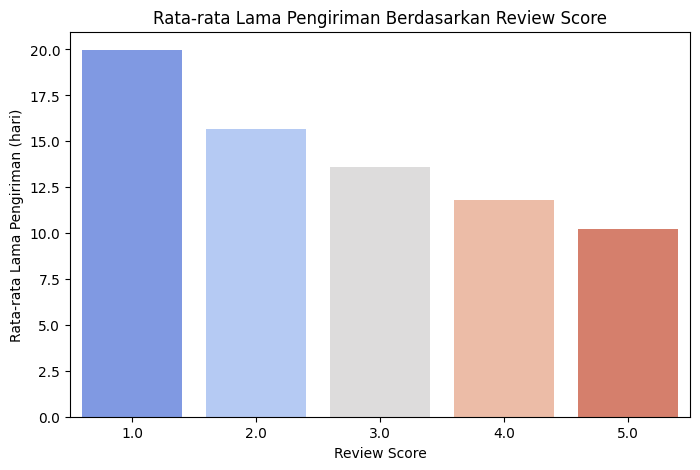

In [83]:
delivery_vs_review = (
    merged_df.groupby('review_score')['delivery_time_days']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(x='review_score', y='delivery_time_days', data=delivery_vs_review, palette='coolwarm')
plt.title('Rata-rata Lama Pengiriman Berdasarkan Review Score')
plt.xlabel('Review Score')
plt.ylabel('Rata-rata Lama Pengiriman (hari)')
plt.show()

## Boxplot Review Score vs Delivery Time

/tmp/ipython-input-2161045084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_time_days', data=merged_df, palette='pastel')


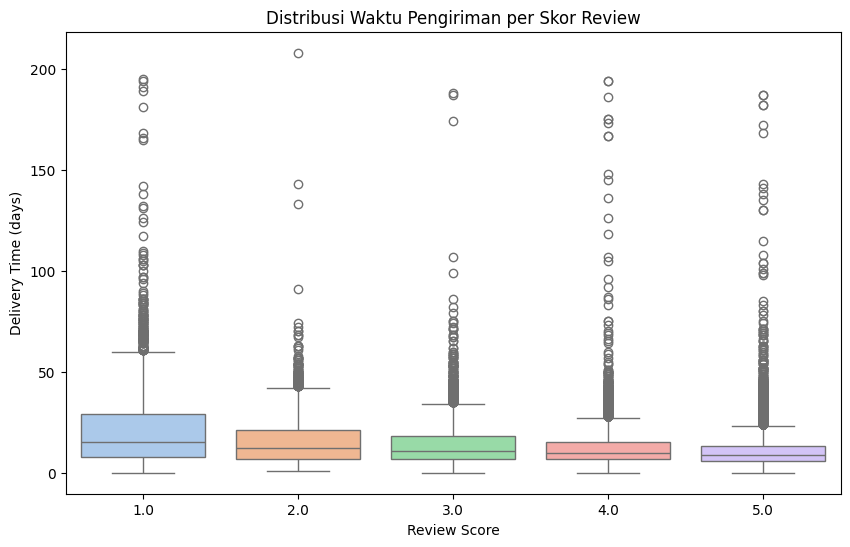

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_time_days', data=merged_df, palette='pastel')
plt.title('Distribusi Waktu Pengiriman per Skor Review')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.show()

**Insight:**
- **Pola performa penjualan**: Penjualan dan pendapatan naik signifikan sepanjang 2017, puncak di November
- **Hubungan pengiriman vs kepuasan**: Waktu pengiriman berpengaruh negatif terhadap review

## Analisis Lanjutan (Opsional)

## Analisis RFM

In [96]:

# Load dataset hasil merge
df = pd.read_csv('olist_cleaned_dataset.csv', parse_dates=['order_purchase_timestamp'])

# cekduplikasi order
df = df.drop_duplicates(subset=['order_id'])

In [100]:
# Load data
payments = pd.read_csv('/content/olist_order_payments_dataset.csv')

df = pd.merge(df, payments[['order_id', 'payment_value']], on='order_id', how='left')

# Cek apakah payment_value ada
print('payment_value' in df.columns)

True


## Hitung Nilai RFM per Pelanggan

In [101]:
reference_date = df['order_purchase_timestamp'].max()

rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',        # Frequency
    'payment_value': 'sum'      # Monetary
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


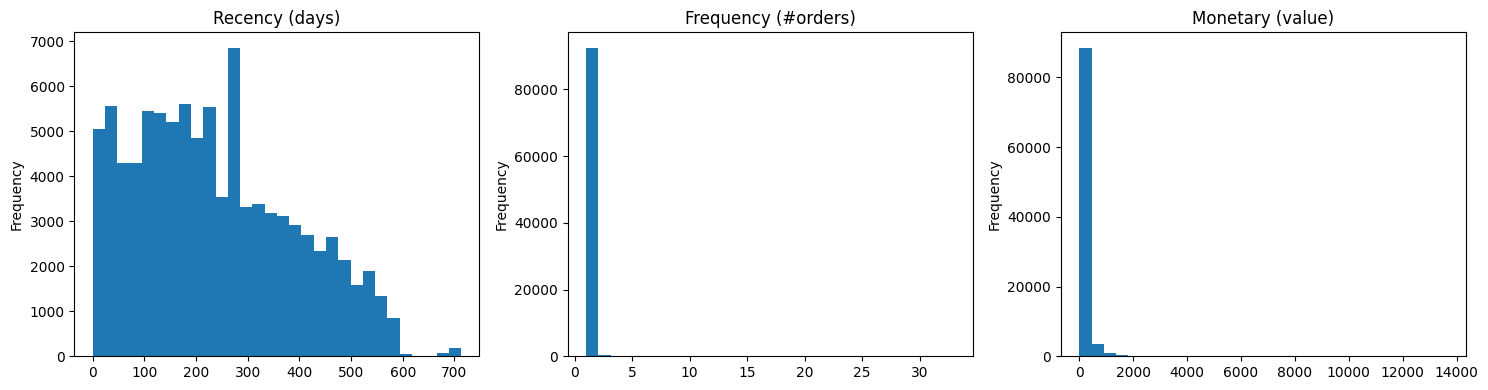

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,6
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,7


In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

rfm['Recency'].plot(kind='hist', ax=axes[0], bins=30, title='Recency (days)')
rfm['Frequency'].plot(kind='hist', ax=axes[1], bins=30, title='Frequency (#orders)')
rfm['Monetary'].plot(kind='hist', ax=axes[2], bins=30, title='Monetary (value)')

plt.tight_layout()
plt.show()

# Skor Recency (semakin kecil nilai, semakin tinggi skor)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Skor Frequency & Monetary (semakin besar nilai, semakin tinggi skor)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Skor total RFM
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm.head()


In [104]:
def segment_rfm(score):
    if score >= 13:
        return 'Best Customers'
    elif score >= 10:
        return 'Loyal Customers'
    elif score >= 7:
        return 'Potential Loyalist'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_rfm)
rfm['Segment'].value_counts()

,count
Segment,
Potential Loyalist,38469
Loyal Customers,31566
At Risk,12219
Best Customers,7956
Lost,3148


## Visualisasi Segmentasi Pelanggan


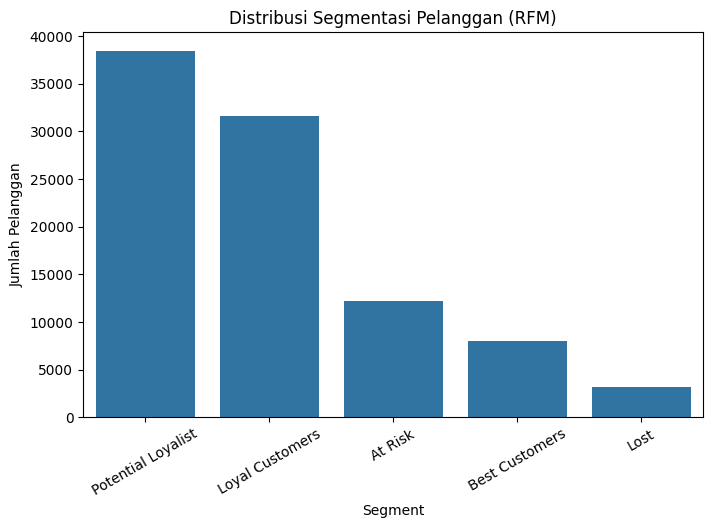

In [105]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Distribusi Segmentasi Pelanggan (RFM)')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Segment')
plt.xticks(rotation=30)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- **Pola performa penjualan**: Penjualan dan pendapatan naik signifikan sepanjang 2017, puncak di November. 5 kategori produk (home & lifestyle, health_beauty) menyumbang mayoritas revenue.
Rekomendasi: Fokuskan strategi promosi dan stok pada high-demand categories menjelang akhir tahun.

- Conclution pertanyaan 2
- **Hubungan pengiriman vs kepuasan**: Waktu pengiriman berpengaruh negatif terhadap review. Pengiriman cepat (<10 hari) menghasilkan rating tinggi (4–5).
Rekomendasi: Optimalkan logistik, tracking real-time, dan SLA pengiriman agar waktu delivery lebih cepat dan konsisten.

In [92]:
from google.colab import files
files.download('olist_cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>